In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 150  # for high resolution figure in notebook
mpl.rcParams["figure.facecolor"] = "white"  # To make sure text is visible in dark mode
plt.rcParams.update({"font.size": 5})

In [5]:
from tiatoolbox.wsicore.wsireader import WSIReader

reader = WSIReader.open('../../data/positive/3j58caqk-(177664_402688)_0.121399_64_0_0.tif', mpp=0.121399)

In [6]:
from pprint import pprint

info_dict = reader.info.as_dict()

|2023-05-06|08:29:13.227| [WARNING] Metadata: Falling back to TIFF resolution tag for microns-per-pixel (MPP).
|2023-05-06|08:29:13.228| [WARNING] Metadata: Objective power inferred from microns-per-pixel (MPP).


In [7]:
pprint(info_dict)

{'axes': 'YXS',
 'file_path': PosixPath('../../data/positive/3j58caqk-(177664_402688)_0.121399_64_0_0.tif'),
 'level_count': 12,
 'level_dimensions': ((177664, 402688),
                      (88832, 201344),
                      (44416, 100672),
                      (22208, 50336),
                      (11104, 25168),
                      (5552, 12584),
                      (2776, 6292),
                      (1388, 3146),
                      (694, 1573),
                      (347, 786),
                      (173, 393),
                      (86, 196)),
 'level_downsamples': [1.0,
                       2.0,
                       4.0,
                       8.0,
                       16.0,
                       32.0,
                       64.0,
                       128.0,
                       256.0,
                       512.1628498727736,
                       1025.8054685316743,
                       2060.1955386805885],
 'mpp': (0.121399, 0.121399),
 'objective_p

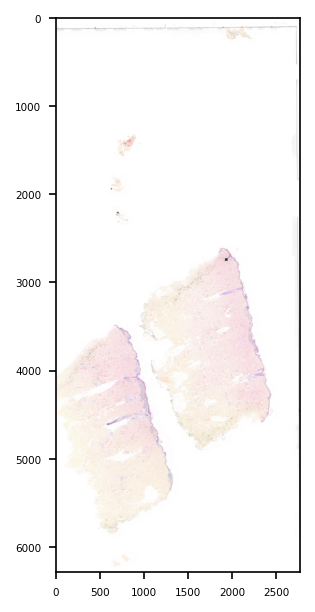

In [54]:
thumbnail = reader.slide_thumbnail(resolution=6, units="level")
plt.imshow(thumbnail)
#plt.axis("off")
plt.show()

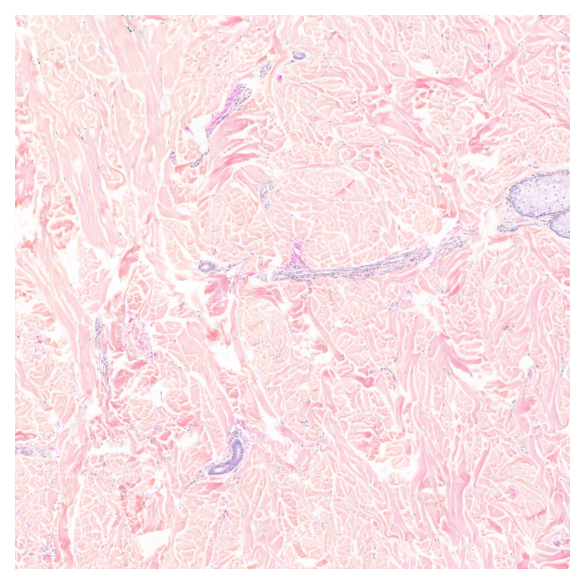

In [41]:
# Location coordinates in (x,y)
location = (2000*16, 15000*16)

# Size of the region in (width, height)
size = (4000, 4000)

# read the region using wsi reader's read rect at 0.5 mpp
img = reader.read_rect(
    location,
    size,
    resolution=0.5,
    units="mpp",
)

plt.imshow(img)
plt.axis("off")
plt.show()

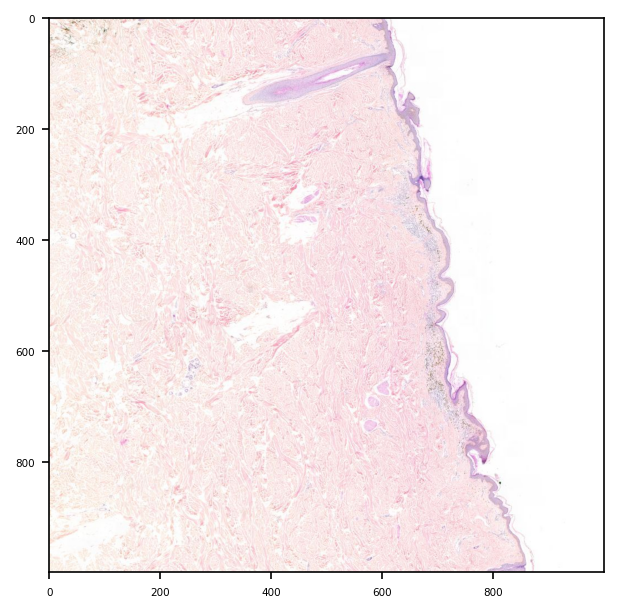

In [61]:
# Specify the bounds in terms of rectangle (left, top, right, bottom)
bounds = (1500, 3000, 2500, 4000)

# Read the region using wsi reader's read bounds at level 0
img = reader.read_bounds(bounds, resolution=6, units="level", coord_space='resolution')

plt.imshow(img)
# plt.axis("off")
plt.show()

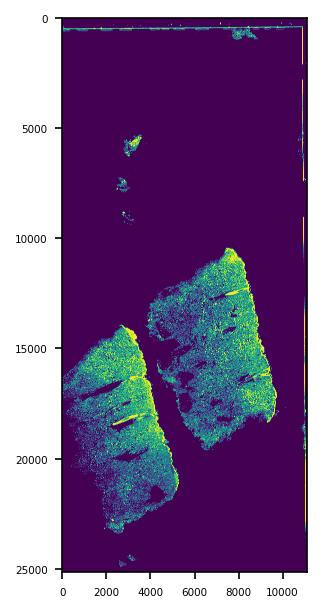

In [13]:
mask_reader = reader.tissue_mask(resolution=4, units="level")
mask_thumbnail = mask_reader.slide_thumbnail(resolution=4, units="level")

plt.imshow(mask_thumbnail)
plt.show()

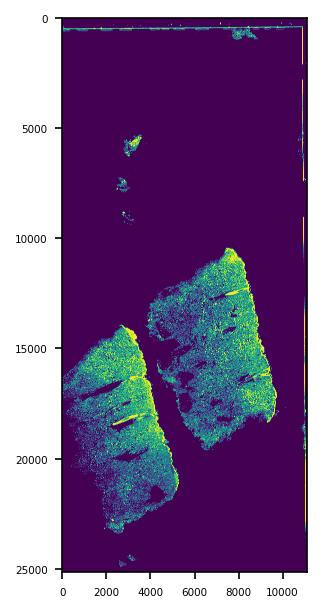

In [15]:
mask_reader = reader.tissue_mask("morphological", resolution=4, units="level")
mask_thumbnail = mask_reader.slide_thumbnail(resolution=4, units="level")

plt.imshow(mask_thumbnail)
plt.show()

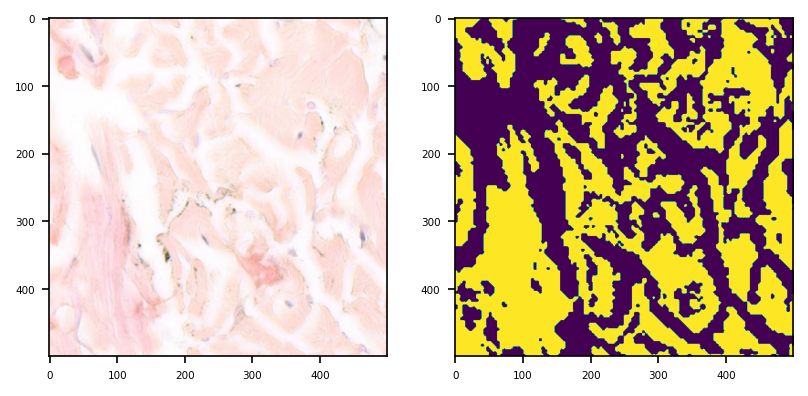

In [62]:
tissue_region = reader.read_rect(
    location=(2000*16, 15000*16, ),
    size=(500, 500),
    resolution=0.5,
    units="mpp",
)
mask_region = mask_reader.read_rect(
    location=(2000*16, 15000*16, ),
    size=(500, 500),
    resolution=0.5,
    units="mpp",
)
_, axs = plt.subplots(1, 2)
axs[0].imshow(tissue_region)
axs[1].imshow(mask_region, vmin=0, vmax=1)
plt.show()